In [1]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

CODE = "/local/home/aarslan/mq"

annotation_json_file_path = f"{CODE}/scripts/07_reproduce_baseline_results/data/ego4d/ego4d_clip_annotations_v4.json"

with open(annotation_json_file_path, "r") as annotation_json_file:
    annotation_dict = json.load(annotation_json_file)

annotations_data = []

for clip_id, clip_info in annotation_dict.items():
    video_id = clip_info["video_id"]
    clip_duration = clip_info["duration"]
    # v_duration = clip_info["v_duration"]
    fps = clip_info["fps"]
    subset = clip_info["subset"]
    if subset in ["train", "val"]:
        for annotation in clip_info["annotations"]:
            annotations_data.append((subset, annotation["label"], video_id, clip_id, clip_duration, fps, annotation["segment"][1] - annotation["segment"][0]))
    else:
        annotations_data.append((subset, np.NaN, video_id, clip_id, clip_duration, fps, np.NaN))

annotations_df = pd.DataFrame(data=annotations_data, columns=["subset", "label", "video_id", "clip_id", "clip_duration", "fps", "label_duration"])


# FPS Histogram

Text(0.5, 1.0, 'Histogram of clip FPS values')

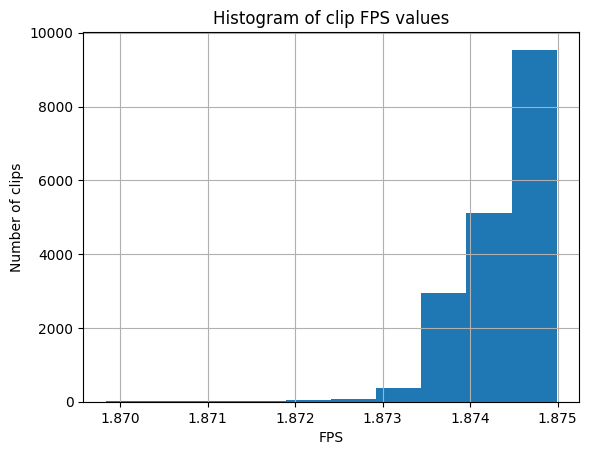

In [2]:
annotations_df["fps"].hist(bins=10)
plt.xlabel("FPS")
plt.ylabel("Number of clips")
plt.title("Histogram of clip FPS values")


# Number of Clips per Subset Histogram

<Axes: >

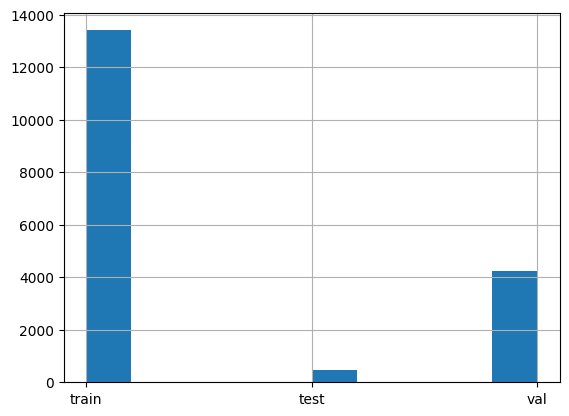

In [3]:
annotations_df["subset"].hist()


# Number of Annotations per Clip Histogram

<Axes: >

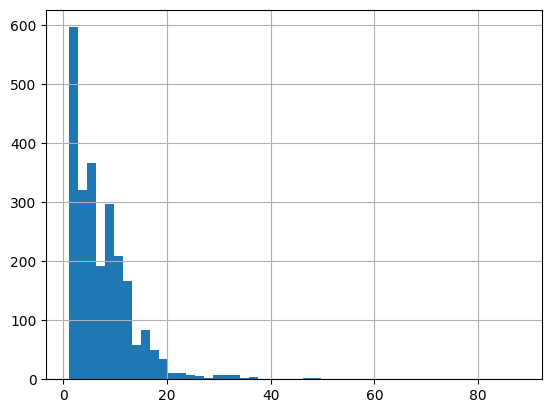

In [4]:
annotations_df.groupby("clip_id").count()["subset"].hist(bins=50)


# Number of Clips per Video Histogram

<Axes: >

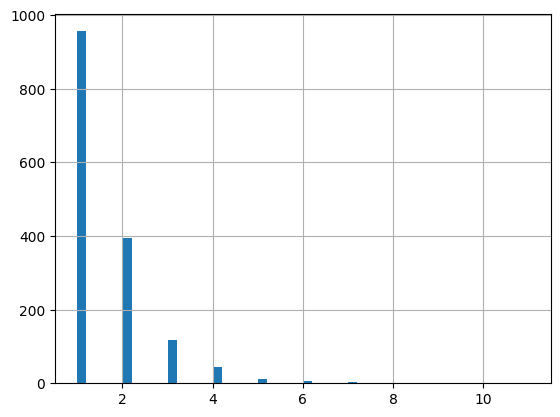

In [9]:
annotations_df.groupby(["video_id"]).agg({"clip_id": "nunique"})["clip_id"].hist(bins=50)


# Clip Duration Histogram

<Axes: >

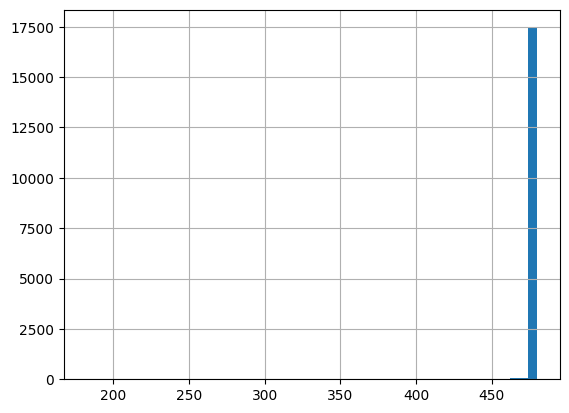

In [10]:
annotations_df["clip_duration"].hist(bins=50)


# Label Duration Histogram

<Axes: >

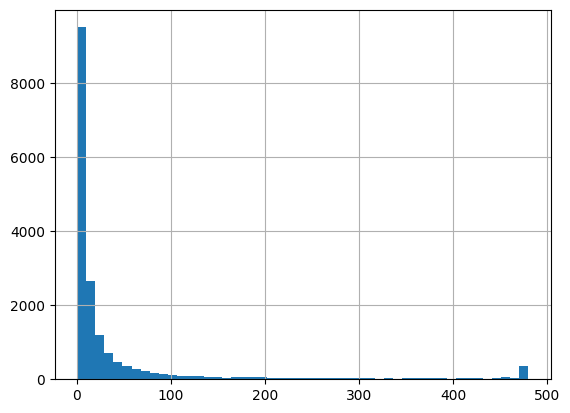

In [11]:
annotations_df["label_duration"].hist(bins=50)


In [12]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(annotations_df.groupby("label").agg({"subset": "count"}))


,subset
label,
"""clean_/_repair_small_equipment_(mower,_trimmer_etc.)""",50
"""cut_/_chop_/_slice_a_vegetable,_fruit,_or_meat""",312
"""level_ground_/_soil_(eg._using_rake,_shovel,_etc)""",65
"""make_the_bed_/_arrange_pillows,_sheets_etc._on_bed""",55
"""put_on_safety_equipment_(e.g._gloves,_helmet,_safety_goggles)""",141
"""try-out_/_wear_accessories_(e.g._tie,_belt,_scarf)""",63
"""try-out_/_wear_clothing_items_(e.g._shirt,_jeans,_sweater)""",128
arrange_/_organize_clothes_in_closet/dresser,65
arrange_/_organize_items_in_fridge,51
